The following procedures are aimed at exploring and analyzing different databases with the end goal of extracting valuable information and identifying patterns. In particular, the first part focuses on the dataset "vending.csv", provided for the assignment, while the following two parts are centered on datasets obtained from the surveys run on Qualtrics both for the general testing of the proposed hypothesis and for the A/B testing of our final proposals.

# PART A (Analyses of provided dataset)

## Index:    <a class="anchor" id="index"></a>
* [Index](#index)
* [Import of relevant libraries](#zero-bullet)
* [Import of data](#first-bullet)
* [Missing Values and Type Checks](#second-bullet)
* [Correlation Checks](#corr-bullet)
* [Dealing with Excess Columns](#third-bullet)
* [Data Visualization and Outliers Checks](#fourth-bullet)
* [Feature Engineering](#fifth-bullet)
* [Exploratory Data Analysis](#sixth-bullet)
* [First t-test](#seventh-bullet)
* [Cash vs Credit Comparison](#eighth-bullet)
* [Second t-test](#ninth-bullet)
* [Cash-Carbonated vs Credit-Carbonated](#tenth-bullet)
* [Location](#eleventh-bullet)
* [RCoil](#twelfth-bullet)
* [CatBoost](#thirhtenth-bullet)



# Import of relevant libraries <a class="anchor" id="zero-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [10]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
%matplotlib inline
np.random.seed(42)

# Import of data <a class="anchor" id="first-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [11]:
db=pd.read_csv('vending.csv')

Brief vizualization the head of the dataset to have a grasp at the data:

In [12]:
db.head()

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,5.0,1/1/2022
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,"Saturday, January 1, 2022",Credit,123,1.5,1,123,1.5,1,1.5,5.0,1/1/2022
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,"Saturday, January 1, 2022",Credit,123,1.5,1,123,1.5,1,1.5,1.5,1/1/2022
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,3.5,1/1/2022


In [13]:
db.shape

(6445, 18)

# Missing Values and Type Checks <a class="anchor" id="second-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

A check for missing values has then been conducted: 

In [14]:
db.isnull().sum()

Status           0
Device ID        0
Location         0
Machine          0
Product          4
Category       185
Transaction      0
TransDate        0
Type             0
RCoil            0
RPrice           0
RQty             0
MCoil            0
MPrice           1
MQty             0
LineTotal        0
TransTotal       0
Prcd Date        0
dtype: int64

For further analyses, the index of the missing values is retrieved:

In [15]:
db[db['MPrice'].isnull()].index.tolist()

[5500]

In [16]:
db[db['Product'].isnull()].index.tolist()

[1232, 1431, 1439, 5500]

In [17]:
mis=db[db['Category'].isnull()].index.tolist()
mis

[1232,
 1431,
 1439,
 1448,
 1453,
 1454,
 1501,
 1507,
 1517,
 1544,
 1569,
 1578,
 1579,
 1779,
 1815,
 2845,
 2871,
 2888,
 2905,
 2924,
 2927,
 2940,
 2948,
 2969,
 2985,
 3008,
 3043,
 3052,
 3057,
 3127,
 3141,
 3162,
 3179,
 3233,
 3254,
 3270,
 3327,
 3355,
 3378,
 3423,
 3447,
 3463,
 3517,
 3522,
 3524,
 3526,
 3528,
 3532,
 3538,
 3541,
 3612,
 3647,
 3655,
 3674,
 3693,
 3707,
 3708,
 3765,
 3766,
 3768,
 3771,
 3772,
 3779,
 3784,
 3790,
 3792,
 3794,
 3849,
 3864,
 3903,
 3917,
 3928,
 3955,
 3965,
 3996,
 4012,
 4036,
 4089,
 4090,
 4091,
 4095,
 4099,
 4100,
 4104,
 4113,
 4116,
 4117,
 4131,
 4135,
 4136,
 4144,
 4156,
 4161,
 4181,
 4192,
 4202,
 4214,
 4229,
 4237,
 4238,
 4274,
 4294,
 4296,
 4306,
 4321,
 4341,
 4345,
 4350,
 4364,
 4365,
 4375,
 4384,
 4420,
 4425,
 4430,
 4431,
 4432,
 4451,
 4465,
 4471,
 4505,
 4508,
 4520,
 4524,
 4528,
 4532,
 4543,
 4565,
 4566,
 4584,
 4585,
 4597,
 4607,
 4625,
 4626,
 4638,
 4676,
 4768,
 4770,
 4796,
 4826,
 4864,
 4866,

Seeing that most of the missing values are in the attribute "Category" but not in the attribute "Product", it is possible to retreive the name of the product so that the missing value can be replaced manually leading to no data loss:

In [18]:
missing=set(db['Product'][mis])
missing

{'Canada Dry - Ginger Ale',
 'Canada Dry - Ginger Ale & Lemonde',
 'Doritos Dinamita Chile Lemon',
 'Doritos Spicy Nacho',
 'Mini Chips Ahoy - Go Paks',
 'Oreo Mini - Go Paks',
 'Starbucks Doubleshot Energy - Coffee',
 'Teddy Grahams - Go Paks',
 nan}

Filling up of NaNs can is done with the following loop:

In [19]:
for i in mis:
    if db['Product'][i]=='Canada Dry - Ginger Ale':
        db['Category'][i]='Carbonated'
    if db['Product'][i]=='Canada Dry - Ginger Ale & Lemonde':
        db['Category'][i]='Carbonated'
    if db['Product'][i]=='Doritos Dinamita Chile Lemon':
        db['Category'][i]='Food'
    if db['Product'][i]=='Doritos Spicy Nacho':
        db['Category'][i]='Food'
    if db['Product'][i]=='Mini Chips Ahoy - Go Paks':
        db['Category'][i]='Food'
    if db['Product'][i]=='Oreo Mini - Go Paks':
        db['Category'][i]='Food'
    if db['Product'][i]=='Starbucks Doubleshot Energy - Coffee':
        db['Category'][i]='Non Carbonated'
    if db['Product'][i]=='Teddy Grahams - Go Paks':
        db['Category'][i]='Food'

There should still remain 4 missing values in the feature "Category" corresponding to those entries that also have a misisng value in the "Product" feature:

In [20]:
mis=db[db['Category'].isnull()].index.tolist()
mis

[1232, 1431, 1439, 5500]

In [21]:
newdb=db.drop(mis,axis=0)

In [22]:
newdb.shape

(6441, 18)

As no further operation is possibile to retrive the 4 missing values left, they have been dropped. Being that they are only 4, out of a total of 6445 observations, the risk of data loss is fairly limited.

Checks of the types of inputs data are then performed:

In [23]:
newdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 6444
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Status       6441 non-null   object 
 1   Device ID    6441 non-null   object 
 2   Location     6441 non-null   object 
 3   Machine      6441 non-null   object 
 4   Product      6441 non-null   object 
 5   Category     6441 non-null   object 
 6   Transaction  6441 non-null   int64  
 7   TransDate    6441 non-null   object 
 8   Type         6441 non-null   object 
 9   RCoil        6441 non-null   int64  
 10  RPrice       6441 non-null   float64
 11  RQty         6441 non-null   int64  
 12  MCoil        6441 non-null   int64  
 13  MPrice       6441 non-null   float64
 14  MQty         6441 non-null   int64  
 15  LineTotal    6441 non-null   float64
 16  TransTotal   6441 non-null   float64
 17  Prcd Date    6441 non-null   object 
dtypes: float64(4), int64(5), object(9)
memory usage:

An additional check to see whether the feature "Status" presents a unique value or more than one has then been performed with the result that the column contains only one value (namely "Processed"):

In [24]:
newdb["Status"].unique()

array(['Processed'], dtype=object)

# Correlation Checks <a class="anchor" id="corr-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>
<br> <br>

In [25]:
corr_matrix=newdb.corr()

<AxesSubplot:>

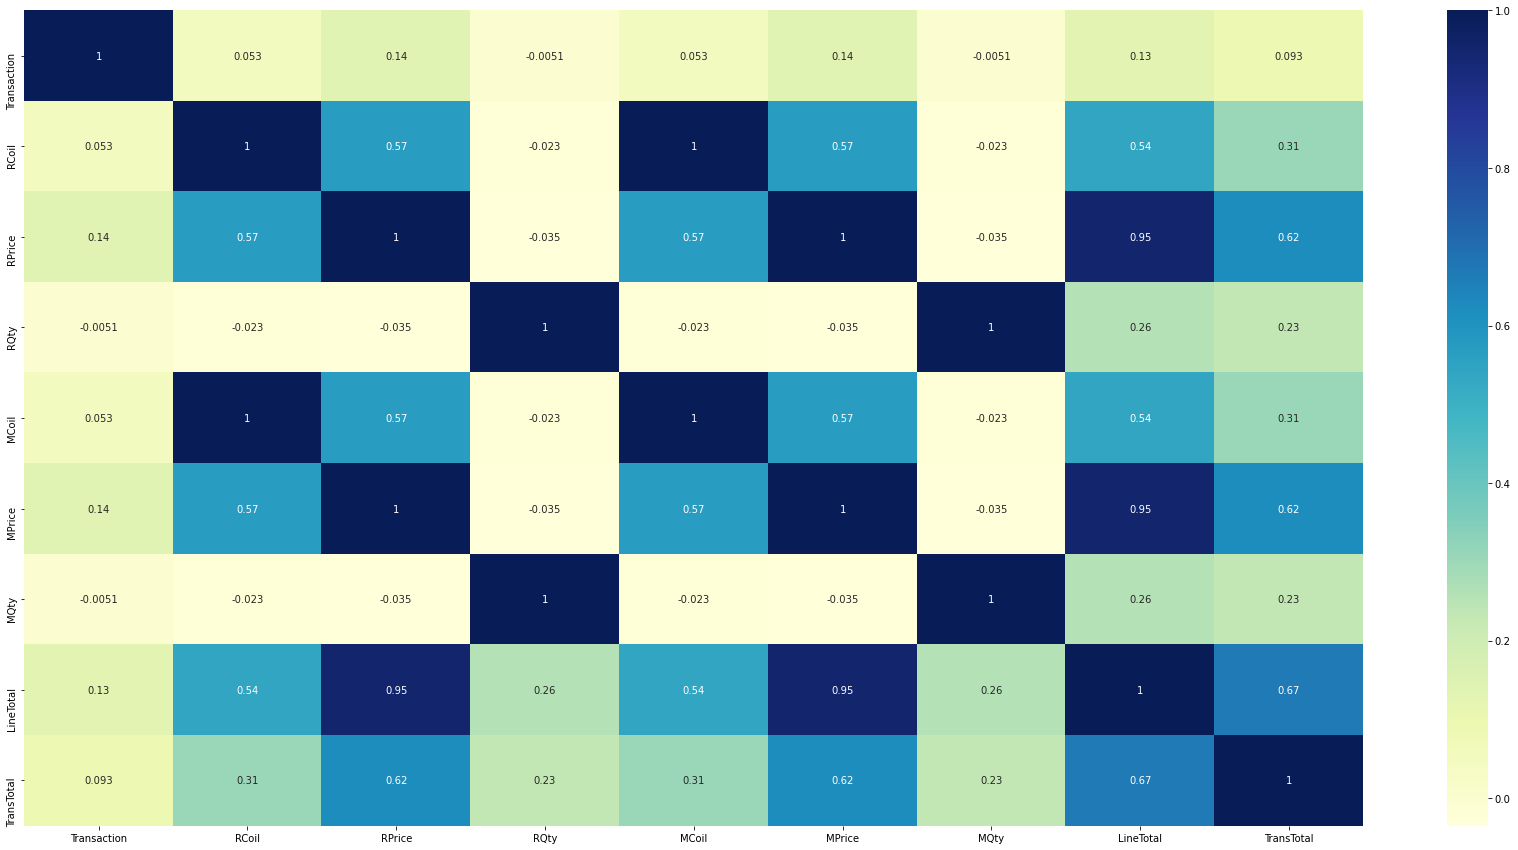

In [26]:
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")

From the correlation matrix it can be seen that some variables present really high (even perfect in some case) correlation with each other. Correlation can cause issues in several algorithms and models, for this reason, this highly correlated variables will be better explored in the subsequent section. 

# Dealing with Excess Columns <a class="anchor" id="third-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>
<br> <br>

In this subsection, all excess columns will be dropped.
To begin with, it can be seen that Coil, Qty, and Price are present in two differnt variations inside the provided dataset. Given that the correlation between the variations is perfect (Pearson's correlation coefficient=1), as highlighted by the correlation matrix, it is very likely that the variations of the aforementioned columns are identical. An assesment of whether they contain the same information is therefore run:

In [27]:
sum(newdb["RCoil"]==newdb["MCoil"])

6441

In [28]:
sum(newdb["RQty"]==newdb["MQty"])

6441

In [29]:
sum(newdb["RPrice"]==newdb["MPrice"])

6441

The assesment conducted, yielded the result that the information contained in the columns compared are the same. Now the same procedure is also run for "RPrice" and "LineTotal" that, in theory, should present at least some different values:

In [30]:
sum(newdb["RPrice"]==newdb["LineTotal"])

6360

And indeed they do.

Now, a check to see whether there are some Transaction ID that are repeated in several dates has been conducted:

In [31]:
df1 = newdb[newdb.groupby('Transaction')['TransDate'].transform('nunique').ne(1)]
df1

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date


Given that the new dataframe is empty, there are no repeated Transaction ID in different days. 

It is now possible to drop the excess columns, meanining those that do not provide additional information to then be used for prediction or data analysis in general:

In [32]:
n_db=newdb.drop(["Status","Device ID","MCoil","MPrice","MQty","Transaction"],axis=1)

In particular, "MPrice", "MQty", and "MCoil" have been dropped as they provide the same information of "RCoil", "RQty", and "RPrice", while "Status" has been dropped because it presents a single values, as showed in the section above. "Devide ID" was dropped as the name of the vending machine is present in the dataset, and so having a feature containing the ID would just be a duplicate information. Last but not least, "Transaction" was dropped aswell since it is just a number indexing transactions, it does not provide additional useful information. 

# Data Visualization and Outliers Checks <a class="anchor" id="fourth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>
<br> <br>

Histograms of remaining data have been plotted to see their approximate distributions:

array([[<AxesSubplot:title={'center':'RCoil'}>,
        <AxesSubplot:title={'center':'RPrice'}>],
       [<AxesSubplot:title={'center':'RQty'}>,
        <AxesSubplot:title={'center':'LineTotal'}>],
       [<AxesSubplot:title={'center':'TransTotal'}>, <AxesSubplot:>]],
      dtype=object)

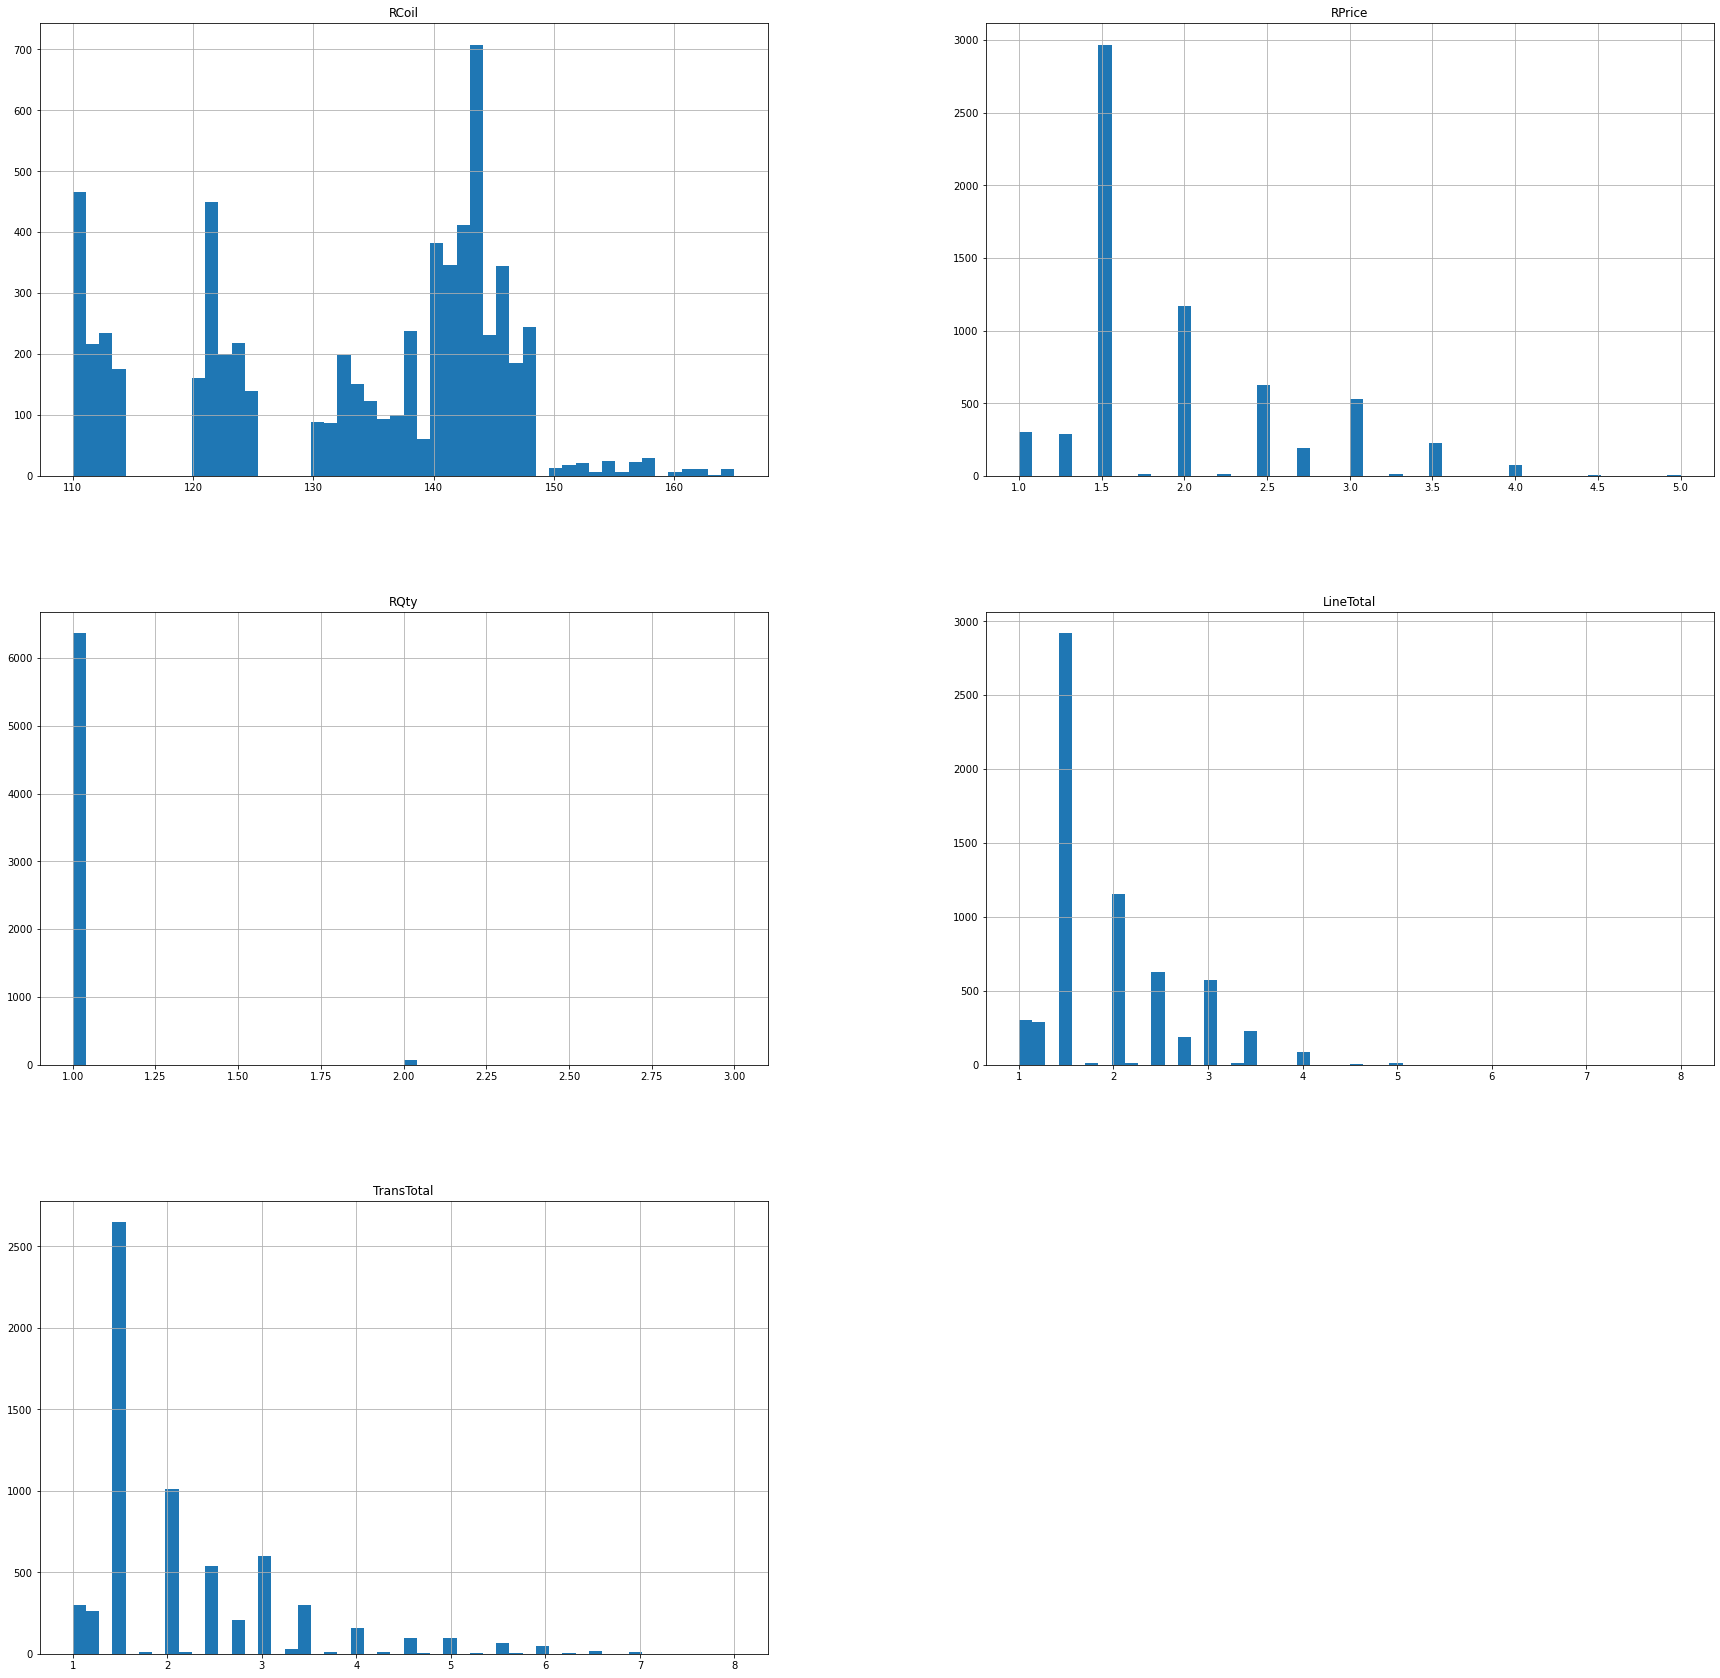

In [33]:
n_db.hist(bins=50, figsize=(30,30))

Data seem in line with the expectationa and do not seem to be very unbalanced. Given that no detailed information about the nature of the data are available, no further action has been taken to rescale/normalize the data for the time being. 

A check for the presence of outliers has then been performed. The check has been, to begin with, done graphically with boxplots. Progressively, columns have been removed so that also visualisation of features with smaller magnitude was possible:

<AxesSubplot:>

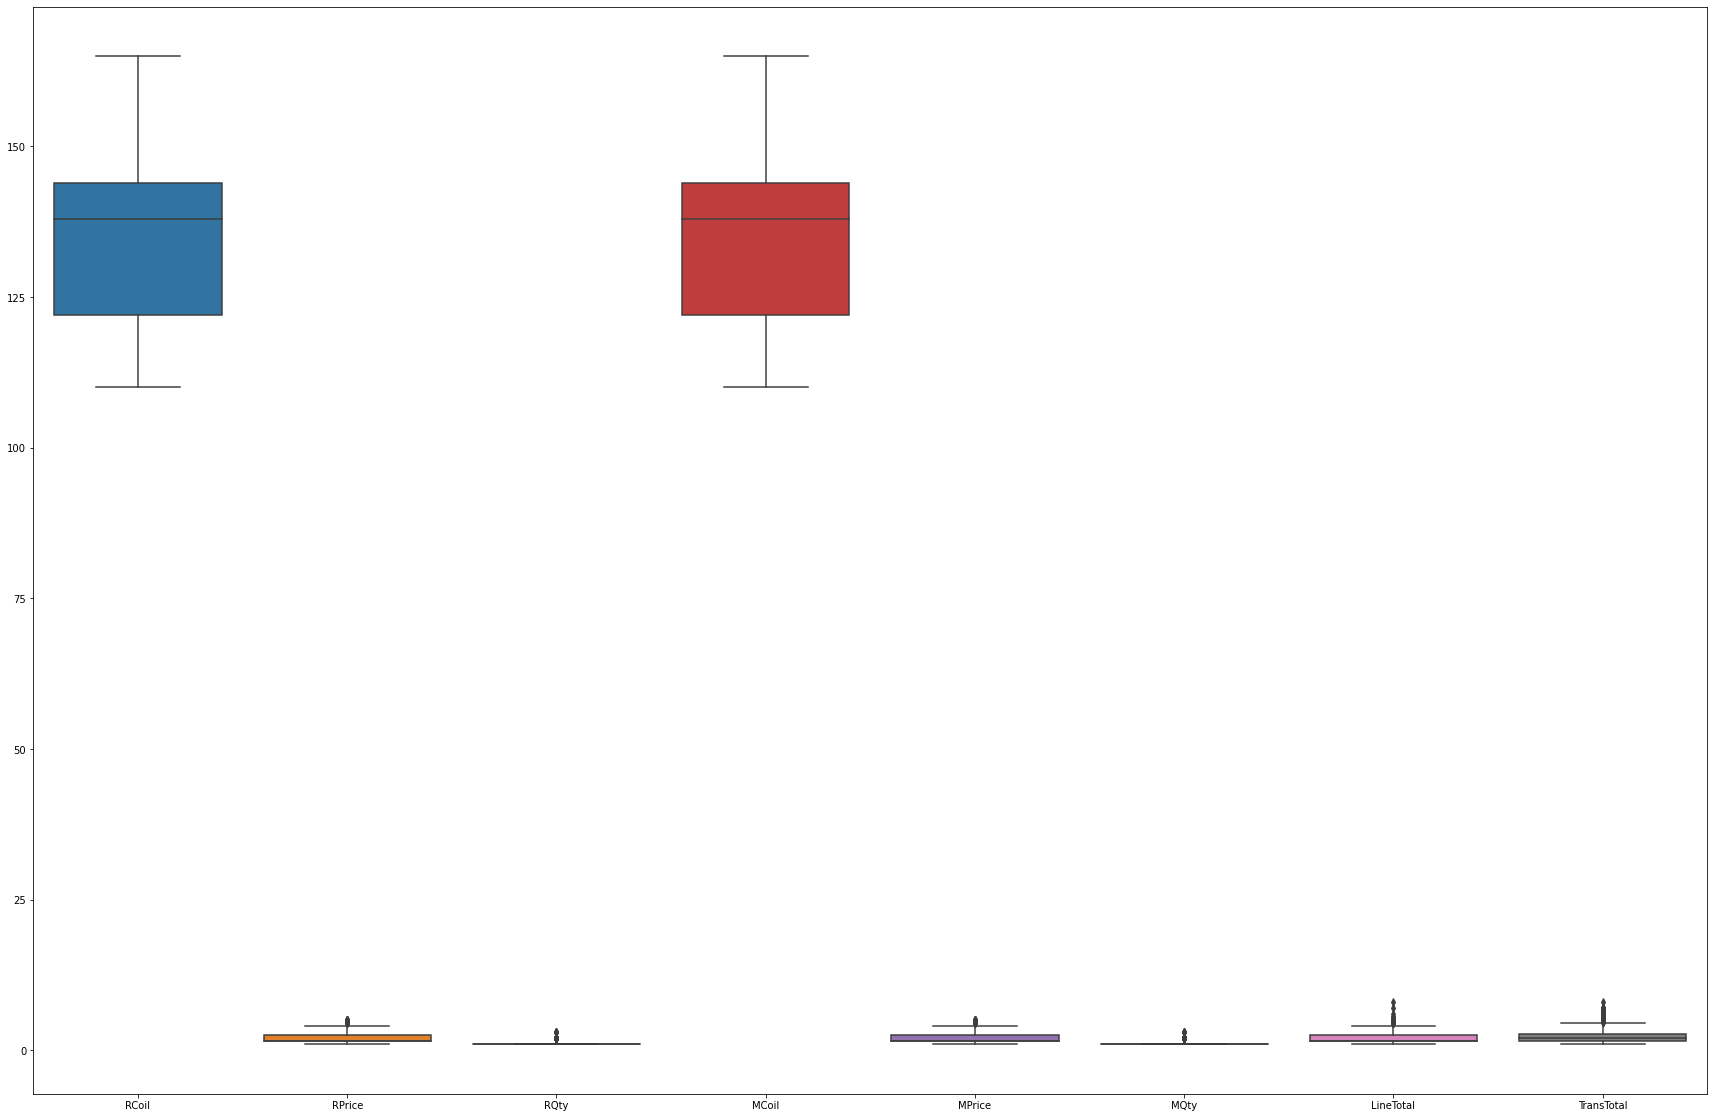

In [34]:
newdb_no_trans=newdb.copy()
newdb_no_trans=newdb_no_trans.drop("Transaction",axis=1)
plt.figure(figsize=(30, 20))
sns.boxplot(data=newdb_no_trans)

<AxesSubplot:>

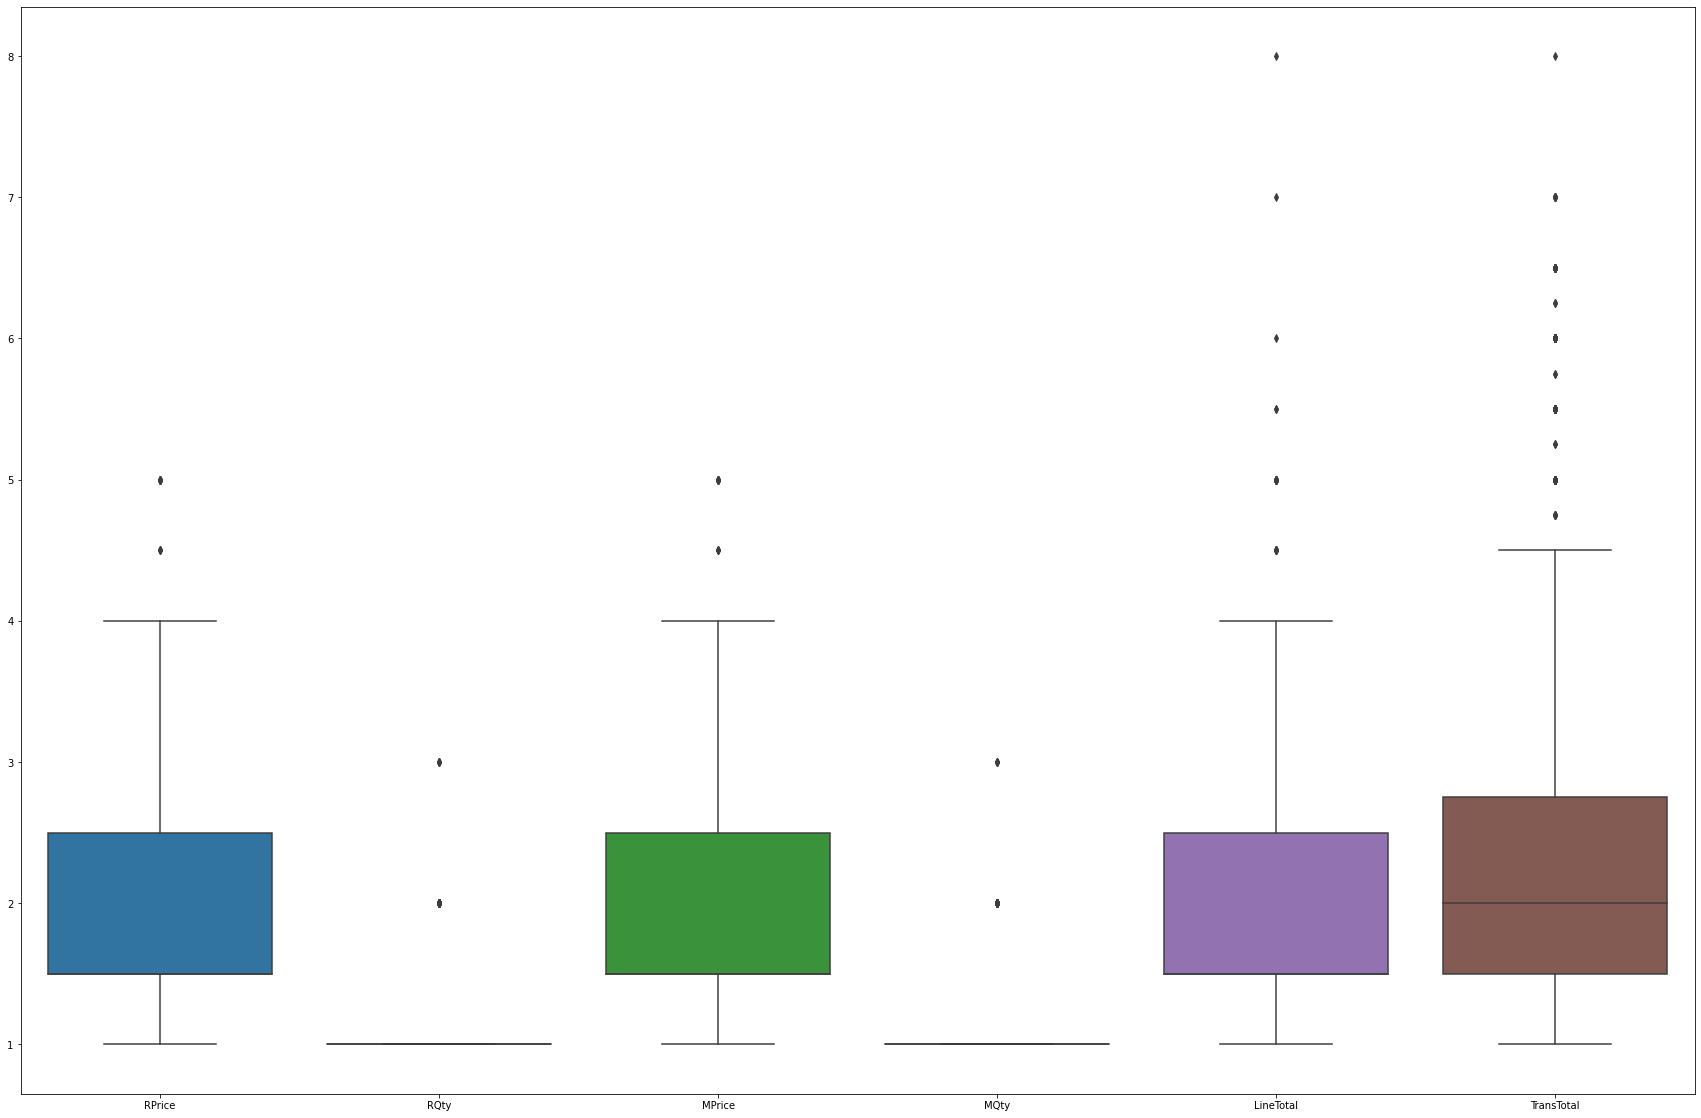

In [35]:
newdb_no_big=newdb.copy()
newdb_no_big=newdb_no_big.drop(["Transaction","RCoil","MCoil"],axis=1)
plt.figure(figsize=(30, 20))
sns.boxplot(data=newdb_no_big)

<AxesSubplot:>

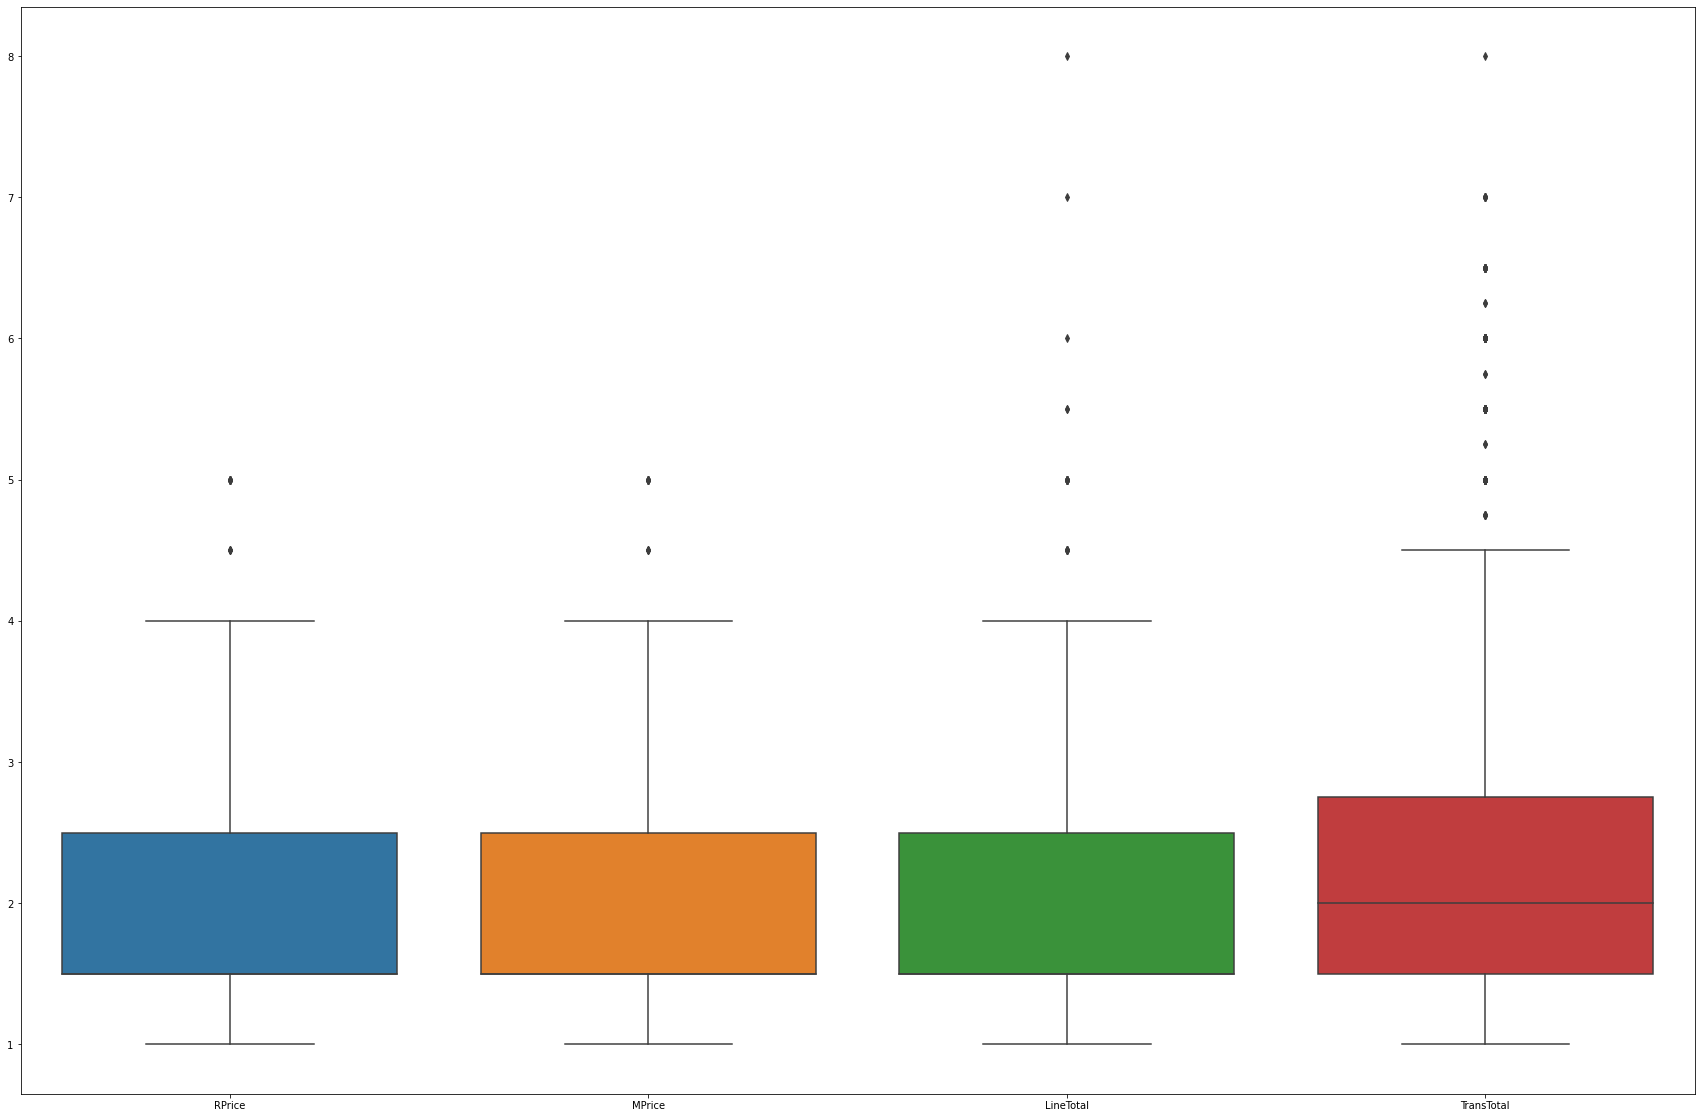

In [36]:
newdb_no_big2=newdb.copy()
newdb_no_big2=newdb_no_big2.drop(["Transaction","RCoil","MCoil","RQty","MQty"],axis=1)
plt.figure(figsize=(30, 20))
sns.boxplot(data=newdb_no_big2)

There seems not to be any absurd value in any of the feature. To double check this, the feature "TransTotal", which will also be the target variable of the analysis, is analysed more in depth:

In [37]:
n_db[n_db["TransTotal"]>6]

,Location,Machine,Product,Category,TransDate,Type,RCoil,RPrice,RQty,LineTotal,TransTotal,Prcd Date
679,GuttenPlans,GuttenPlans x1367,Jack Links Beef Steak Original,Food,"Friday, February 11, 2022",Credit,133,2.00,1,2.00,6.50,2/11/2022
680,GuttenPlans,GuttenPlans x1367,Popchips Potato - Barbeque,Food,"Friday, February 11, 2022",Credit,114,1.50,1,1.50,6.50,2/11/2022
681,GuttenPlans,GuttenPlans x1367,Monster Energy Original,Carbonated,"Friday, February 11, 2022",Credit,144,3.00,1,3.00,6.50,2/11/2022
782,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Original,Carbonated,"Thursday, February 17, 2022",Credit,148,3.50,2,7.00,7.00,2/17/2022
783,GuttenPlans,GuttenPlans x1367,Jack Links Beef Steak Original,Food,"Thursday, February 17, 2022",Credit,133,2.00,1,2.00,7.00,2/17/2022
784,GuttenPlans,GuttenPlans x1367,KitKat - Crisp Wafers,Food,"Thursday, February 17, 2022",Credit,134,2.00,1,2.00,7.00,2/17/2022
785,GuttenPlans,GuttenPlans x1367,Monster Energy Original,Carbonated,"Thursday, February 17, 2022",Credit,144,3.00,1,3.00,7.00,2/17/2022
801,GuttenPlans,GuttenPlans x1367,Jack Links Beef Steak Original,Food,"Friday, February 18, 2022",Credit,133,2.00,1,2.00,6.50,2/18/2022
802,GuttenPlans,GuttenPlans x1367,KitKat - Crisp Wafers,Food,"Friday, February 18, 2022",Credit,134,2.00,1,2.00,6.50,2/18/2022
803,GuttenPlans,GuttenPlans x1367,Snapple Tea - Raspberry,Non Carbonated,"Friday, February 18, 2022",Credit,147,2.50,1,2.50,6.50,2/18/2022


It is possible to notice that the values greter than 6 are still plausible values, as a consequence, no row has been dropped to prevent information loss. 

# Feature Engineering <a class="anchor" id="fifth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

Some feature engineering was then perform to prepare the data to be fed to algotithms and models for analysis.

To begin with, the date feature was split:

In [38]:
n_db["Date_Split"]=n_db["TransDate"].str.split(", ")

In [39]:
n_db[["Day_of_Week","Month+Day","Year"]]=pd.DataFrame(n_db.Date_Split.tolist(),index=n_db.index)

At this point, some columns contain same information about the data as others. A drop is therefore necessary:

In [40]:
n_db=n_db.drop(["TransDate","Date_Split"],axis=1)

Days were then split between Festive and Working days. Days were classified as festive if they were either a saturday, a sunday, or a New Jersey State holiday (https://www.state.nj.us/nj/about/facts/holidays/). Holidays were considered up to July, month of the latest observation in the dataset. The code to perform such operation is as follows:

In [41]:
holiday=["January 1","January 17","February 21","April 15","May 30","June 17","July 4"]
n=(n_db["Day_of_Week"]=="Saturday") | (n_db["Day_of_Week"]=="Sunday") 
m=n_db["Month+Day"].isin(holiday)

In [42]:
n_db["Festive"]=np.where(n|m,1,0)

The column containing the year was also dropped as it contained do additional information given that all observation in the dataset are from 2022:

In [43]:
n_db=n_db.drop(["Year"],axis=1)

Once the days were classified as festive or nor, a column containing the month was created:

In [44]:
l=[]
for i in range(len(n_db["Month+Day"])):
    l.append(n_db["Month+Day"].iloc[i].split(" ")[0])
n_db["Month"]=l

And, once again, columns containing duplicate information were dropped:

In [45]:
n_db = n_db.drop(["Month+Day","Prcd Date"],axis=1)

The precise day date of the month was dropped as it was deemed not that relevant once the indication of the month, of the week day, and of whether that day was festive or not was included. 

## Exploratory Data Analysis <a class="anchor" id="sixth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In this section, some exploratory data analysis has been conducted in order to deepen the knowledge of the data at hand and to try to identify patterns or charcateristics linking different purchases.

The "TransTotal" has been analysed as it is the variable of interest of the analysis. The means has been plotted according to different weekdays:

<AxesSubplot:xlabel='Day_of_Week'>

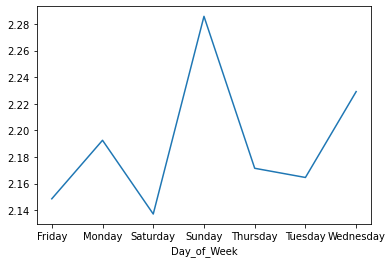

In [46]:
n_db.groupby('Day_of_Week')["TransTotal"].mean().plot()

There seems to be a difference in means between different days. To see whether this difference is really due to "Day_of_Week" or rather to other factors, the "Type" of the transaction was also included: 

In [47]:
n_db.groupby(['Type', 'Day_of_Week'])["TransTotal"].mean()

Type    Day_of_Week
Cash    Friday         1.837644
        Monday         1.847243
        Saturday       1.923684
        Sunday         1.868834
        Thursday       1.854058
        Tuesday        1.836763
        Wednesday      1.868385
Credit  Friday         2.826803
        Monday         2.850852
        Saturday       2.622010
        Sunday         2.867188
        Thursday       2.882698
        Tuesday        2.788512
        Wednesday      2.925393
Name: TransTotal, dtype: float64

There seems to be a relevant difference between the average transaction total for purchases made with card and the ones made with cash. In particular:

In [48]:
n_db.groupby('Type')["TransTotal"].mean()

Type
Cash      1.858324
Credit    2.833411
Name: TransTotal, dtype: float64

# First t-test <a class="anchor" id="seventh-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

To see whether the empirically discovered difference is statistically significant, a t-test has been run:

In [49]:
from scipy import stats
stats.ttest_ind(a=n_db[n_db['Type'] == 'Cash'].TransTotal, b=n_db[n_db['Type']== 'Credit'].TransTotal, equal_var=False)

Ttest_indResult(statistic=-31.916125815473997, pvalue=1.4498531340664352e-189)

Given that the p-value is approximately 0, the null hypothesis of non-significance of the difference has been rejected and so there is a statistically significant difference between the transactions done with card and with cash. 

At this point, since there is a statistically significant difference, a deeper comparison has been run on Cash VS Credit in the following section.

# Cash vs Credit Comparison <a class="anchor" id="eighth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In this section, a deeper analysis has been run to understand whether other features can be the main cause in the differnce between average transaction total when paying with card with respect to when paying with cash.

After this point there isn't any operation on the original ready n_db dataset, just some exploratory analysis. 

First of all, a comparison within categories has been carried out:

In [50]:
d_cash = n_db[n_db['Type'] == 'Cash']
d_credit = n_db[n_db['Type'] == 'Credit']

(<AxesSubplot:>, <AxesSubplot:>)

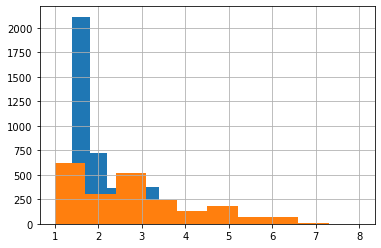

In [51]:
d_cash['TransTotal'].hist(), d_credit['TransTotal'].hist()

In [52]:
d_credit.groupby('Category')["TransTotal"].mean()

Category
Carbonated        2.740909
Food              2.842359
Non Carbonated    3.224379
Water             2.336788
Name: TransTotal, dtype: float64

In [53]:
d_credit.groupby('Day_of_Week')["TransTotal"].mean()

Day_of_Week
Friday       2.826803
Monday       2.850852
Saturday     2.622010
Sunday       2.867188
Thursday     2.882698
Tuesday      2.788512
Wednesday    2.925393
Name: TransTotal, dtype: float64

In [54]:
d_cash.groupby('Day_of_Week')["TransTotal"].mean()

Day_of_Week
Friday       1.837644
Monday       1.847243
Saturday     1.923684
Sunday       1.868834
Thursday     1.854058
Tuesday      1.836763
Wednesday    1.868385
Name: TransTotal, dtype: float64